# Bike Sharing Analysis

`Biking is one of my favorite activities to do during warmer weathers. In Boston, I use a bike sharing service called Blue Bikes, and I am very curious to see how demand varies with various weather. This dataset below is imported from Kaggle (https://www.kaggle.com/juliajemals/bike-sharing-washington-dc) and from the DC metro area.`

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
import matplotlib.style as style
style.use('fivethirtyeight')

#plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

## Initial data exploration and splitting

In [166]:
data = pd.read_csv("bike_sharing_dataset.csv",index_col = 0)
pd.set_option('display.max_columns', 999) #see all columns
print("shape of data:", data.shape)
data.describe(include = 'all') #include all to check for categorical and numerical data, seems like only numerical

shape of data: (2922, 28)


,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,wt_sleet,wt_hail,wt_glaze,wt_haze,wt_drift_snow,wt_high_wind,wt_mist,wt_drizzle,wt_rain,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
count,2101.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,1503.0,208.0,694.0,129.0,50.0,153.0,705.0,7.0,258.0,371.0,128.0,406.0,5.0,84.0,36.0,10.0,4.0,1.0,2918.000000,2918.000000,2918.000000,89.0
mean,14.419007,8.506468,19.015689,11.069243,3.435734,3.162898,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1679.776217,6046.297121,7726.073338,1.0
std,9.556401,9.473941,9.835524,9.481232,8.183658,1.379582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1560.762932,2756.888032,3745.220092,0.0
min,-12.100000,-16.993750,-7.980000,-15.658333,0.000000,0.375000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,19.000000,21.000000,1.0
25%,6.566667,0.516538,11.081562,3.013068,0.005510,2.200000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,512.250000,3839.250000,4628.500000,1.0
50%,15.433333,8.504911,19.992857,11.619091,0.271504,2.900000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1220.500000,5964.000000,7442.500000,1.0
75%,23.066667,17.338393,27.874583,19.767083,2.885381,3.875000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2357.250000,8187.500000,10849.500000,1.0
max,31.733333,26.206250,37.850000,28.666667,118.789796,12.750000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10173.000000,15419.000000,19113.000000,1.0


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 2011-01-01 to 2018-12-31
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp_avg           2101 non-null   float64
 1   temp_min           2922 non-null   float64
 2   temp_max           2922 non-null   float64
 3   temp_observ        2922 non-null   float64
 4   precip             2922 non-null   float64
 5   wind               2922 non-null   float64
 6   wt_fog             1503 non-null   float64
 7   wt_heavy_fog       208 non-null    float64
 8   wt_thunder         694 non-null    float64
 9   wt_sleet           129 non-null    float64
 10  wt_hail            50 non-null     float64
 11  wt_glaze           153 non-null    float64
 12  wt_haze            705 non-null    float64
 13  wt_drift_snow      7 non-null      float64
 14  wt_high_wind       258 non-null    float64
 15  wt_mist            371 non-null    float64
 16  wt_drizzle    

Text(0.5, 1.0, 'Demand over time')

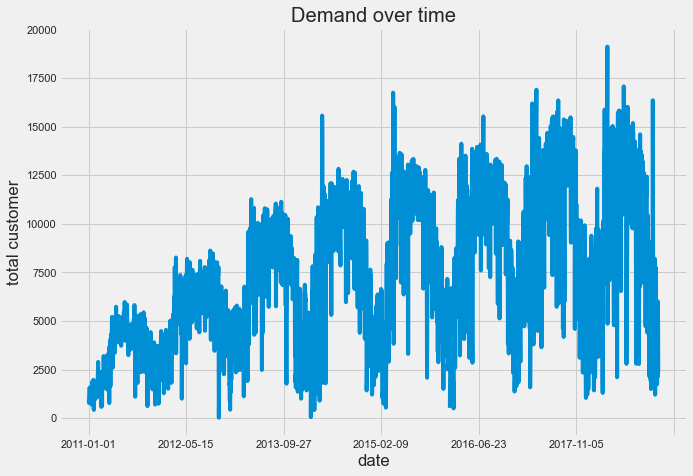

In [168]:
plt.figure()
data['total_cust'].plot(figsize = (10,7))
plt.ylabel('total customer')
plt.title('Demand over time')

Demand seems to be seasonal, which makes sense. People do not like biking or going out in colder weather (i.e. snow). The bike sharing business also seems to be growing and this is evident through the rise in demand over the years. We can also potentially predict seasonal demand.

In [169]:
from sklearn.model_selection import train_test_split

#to prevent train-test contamination
X = data.drop(['total_cust', 'casual', 'registered'], axis = 1)
y = data[['total_cust', 'casual', 'registered']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

full_train = pd.concat([train_X, train_y], axis=1)
full_test = pd.concat([test_X, test_y], axis=1)

full_train.head()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,wt_sleet,wt_hail,wt_glaze,wt_haze,wt_drift_snow,wt_high_wind,wt_mist,wt_drizzle,wt_rain,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,holiday,total_cust,casual,registered
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-06-28,20.966667,11.592308,26.530769,15.450000,0.227835,2.50,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14893.0,3416.0,11477.0
2015-03-24,4.566667,-0.331250,7.625000,1.983333,0.000000,2.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7729.0,956.0,6773.0
2018-03-30,18.566667,7.363636,24.625000,17.255556,0.385000,6.50,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11113.0,3541.0,7572.0
2016-09-20,22.933333,19.964286,24.721429,20.270000,10.237895,2.80,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12630.0,1926.0,10704.0
2011-10-07,NaN,7.453333,21.966667,10.366667,0.005747,0.80,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4925.0,949.0,3976.0


In [170]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(2191, 25) (731, 25) (2191, 3) (731, 3)


## Features exploration

Text(0, 0.5, 'Features')

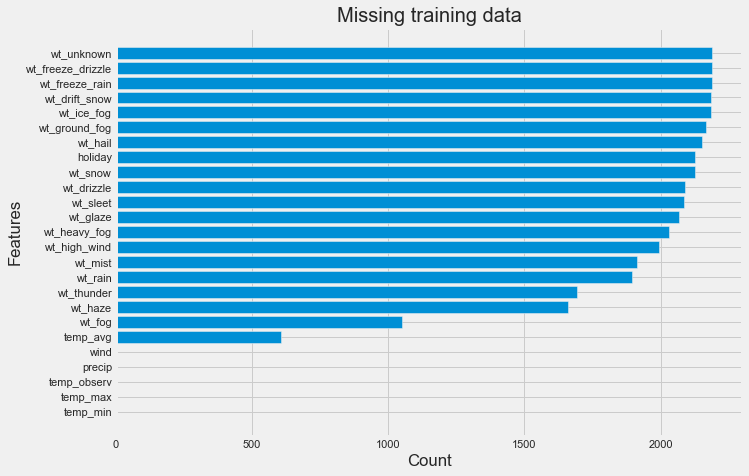

In [171]:
features = train_X.columns

count = []

for feature in features:
    length = train_X[feature].count()
    count.append(length)
    
count = pd.Series(count)

missing = pd.DataFrame()
missing['features'] = features
missing['count'] = len(train_X) - count
missing.sort_values(by=['count'], inplace=True)

plt.figure(figsize =(10,7))
plt.barh(missing['features'], missing['count'])
plt.title('Missing training data')
plt.xlabel('Count')
plt.ylabel('Features')

Text(0, 0.5, 'Frequency')

<Figure size 432x288 with 0 Axes>

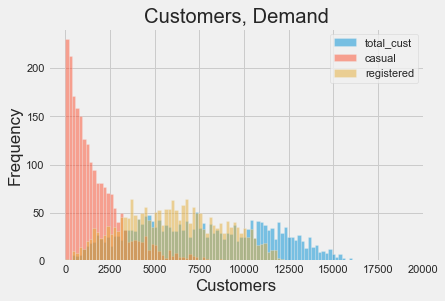

In [172]:
plt.figure()
train_y.plot(kind = 'hist', bins = 100, alpha = 0.5)
plt.title('Customers, Demand')
plt.xlabel('Customers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

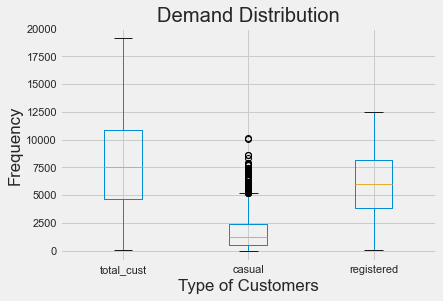

In [173]:
plt.figure()
train_y.boxplot()
plt.title('Demand Distribution')
plt.xlabel('Type of Customers')
plt.ylabel('Frequency')

In [174]:
per = train_y['registered'].sum()/train_y['total_cust'].sum()*100.0
print("Percentage of registered customer rides:", f'{per:.2f}%')

Percentage of registered customer rides: 78.31%


There are way more registered customers riding than casual customers riding at given times. 

There seems to be a lot of outliers for casual riders. This makes sense, because if the weather happens to be really nice one day, then there would be an influx of new casual riders that wants to enjoy the weather for only one day. There are no outliers in registered because registered riders are subscribed and use the bikes more frequently. There are also no outliers in total customers because majority of the total customers are registered.

Text(0.5, 1.0, 'Distribution of average temp')

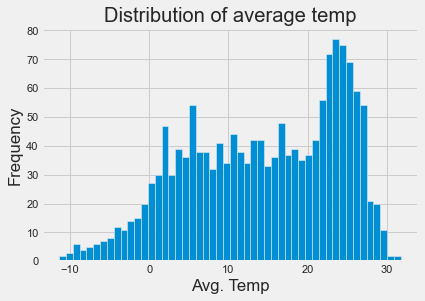

In [175]:
plt.figure()
plt.hist(train_X['temp_avg'], bins=50)
plt.xlabel("Avg. Temp")
plt.ylabel("Frequency")
plt.title("Distribution of average temp")

Text(0, 0.5, 'Demand')

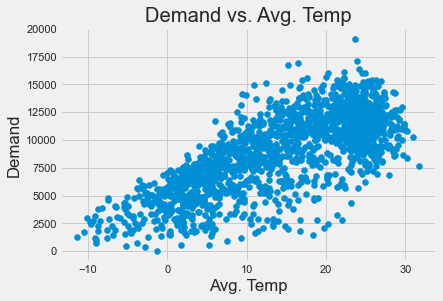

In [176]:
plt.figure()
plt.scatter(train_X['temp_avg'], train_y['total_cust'])
plt.title('Demand vs. Avg. Temp')
plt.xlabel('Avg. Temp')
plt.ylabel('Demand')

Text(0, 0.5, 'Demand')

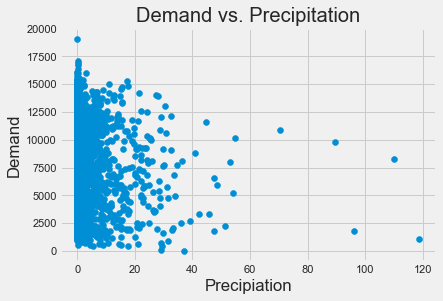

In [177]:
plt.figure()
plt.scatter(train_X['precip'], train_y['total_cust'])
plt.title('Demand vs. Precipitation')
plt.xlabel('Precipiation')
plt.ylabel('Demand')

Text(0, 0.5, 'Demand')

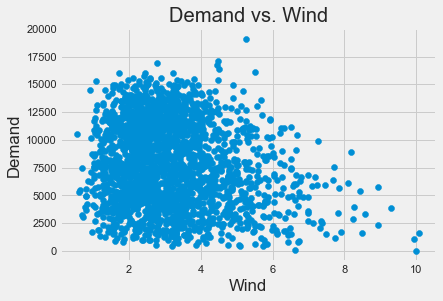

In [178]:
plt.figure()
plt.scatter(train_X['wind'], train_y['total_cust'])
plt.title('Demand vs. Wind')
plt.xlabel('Wind')
plt.ylabel('Demand')

In extreme low temperature and high precipitation and wind, there are less demand. This matches emperical evidence and we should expect lower demand during severe weather seasons.

Text(0.5, 1.0, 'Correlation Heatmap between continuous variables')

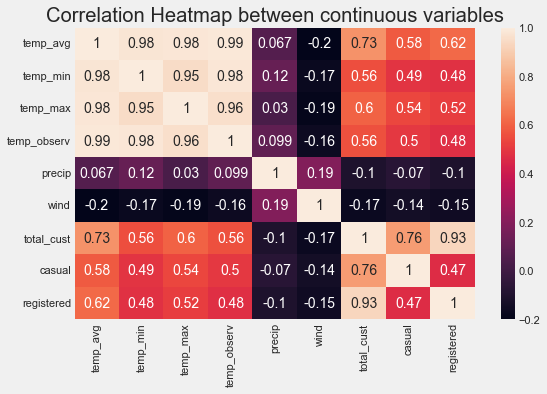

In [179]:
heatmap_full_train = full_train.drop(['wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
                                      'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist', 
                                      'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
                                      'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown', 'holiday'], axis=1)
# discrete variables

plt.figure(figsize=(8,5))
sns.heatmap(heatmap_full_train.corr(), annot=True)
plt.title("Correlation Heatmap between continuous variables")

All the temperature variables have a high correlation, which makes sense. I have decided to use the average temperature as my main feature to predict demand.

Registered customers and total customers are also highly correlated, but casual customers are not, so it might be interesting to look at casual customers vs registered customers. Casual customers exhibit a different riding pattern than registered users.

## Imputing

In [180]:
features

Index(['temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip', 'wind',
       'wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
       'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
       'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
       'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown', 'holiday'],
      dtype='object')

In [181]:
# drop 'wt_unknown' column (only one row has value, insignificant)
train_X.drop(['wt_unknown'], axis = 1, inplace=True)
test_X.drop(['wt_unknown'], axis = 1, inplace=True)

cols_to_fill_0 = ['wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
                  'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
                  'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
                  'wt_ice_fog', 'wt_freeze_drizzle', 'holiday']

train_X[cols_to_fill_0] = train_X[cols_to_fill_0].fillna(0)
test_X[cols_to_fill_0] = test_X[cols_to_fill_0].fillna(0)

# for simplicity sake, not a good way to impute temperature
train_X['temp_avg'].fillna((train_X['temp_min'] + train_X['temp_max']) / 2, inplace = True)
test_X['temp_avg'].fillna((test_X['temp_min'] + test_X['temp_max']) / 2, inplace = True)

In [182]:
train_y.fillna(train_y.median(), inplace = True)
test_y.fillna(test_y.median(), inplace = True)

print(train_X.isnull().sum(), test_X.isnull().sum(), train_y.isnull().sum(), test_y.isnull().sum())

temp_avg             0
temp_min             0
temp_max             0
temp_observ          0
precip               0
wind                 0
wt_fog               0
wt_heavy_fog         0
wt_thunder           0
wt_sleet             0
wt_hail              0
wt_glaze             0
wt_haze              0
wt_drift_snow        0
wt_high_wind         0
wt_mist              0
wt_drizzle           0
wt_rain              0
wt_freeze_rain       0
wt_snow              0
wt_ground_fog        0
wt_ice_fog           0
wt_freeze_drizzle    0
holiday              0
dtype: int64 temp_avg             0
temp_min             0
temp_max             0
temp_observ          0
precip               0
wind                 0
wt_fog               0
wt_heavy_fog         0
wt_thunder           0
wt_sleet             0
wt_hail              0
wt_glaze             0
wt_haze              0
wt_drift_snow        0
wt_high_wind         0
wt_mist              0
wt_drizzle           0
wt_rain              0
wt_freeze_rain       

Text(0, 0.5, 'Frequency')

<Figure size 432x288 with 0 Axes>

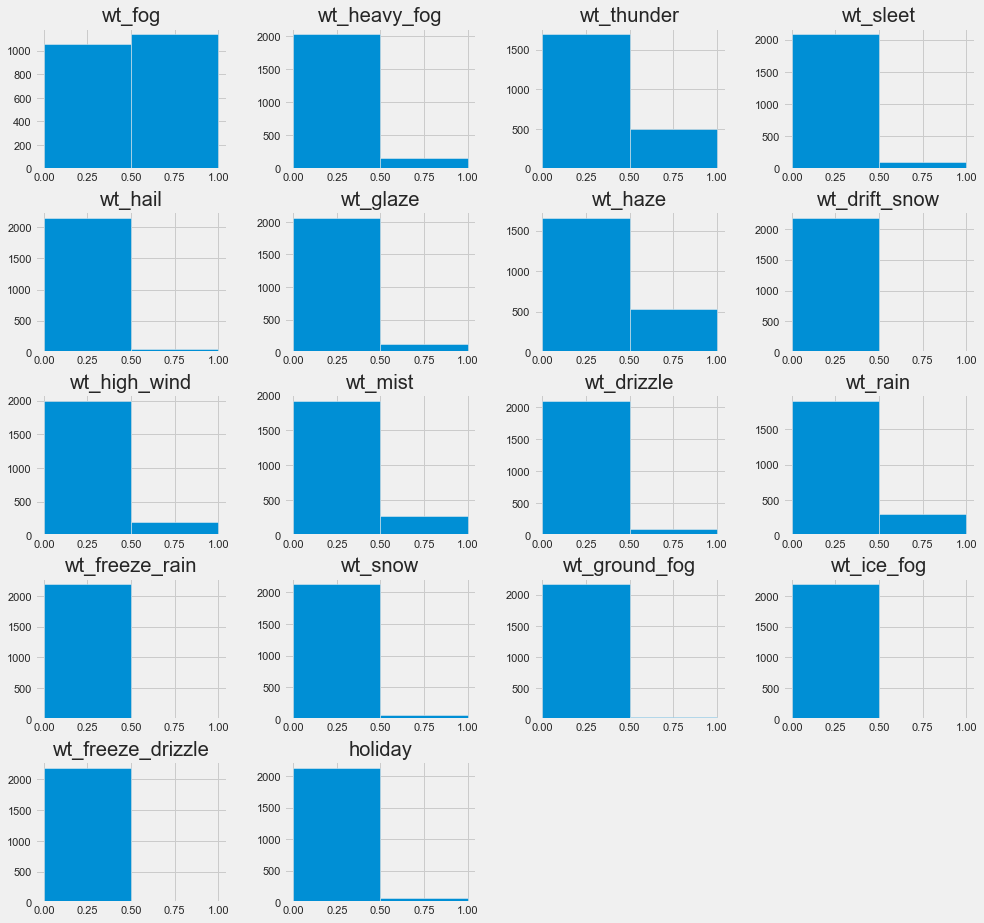

In [250]:
plt.figure()
train_X[cols_to_fill_0].hist(figsize=(15,15),bins=2)
plt.title('Demand Distribution')
plt.xlabel('Type of Customers')
plt.ylabel('Frequency')

Lots of unbalance. There are not that many data on various weather and holidays. Therefore, it might be hard to predict demand based on weather conditions and holidays.

## ML algorithms

### Linear regression

In [184]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Demand looks like it satisfies Least Square Assumptions

lm_features = ['temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip',
               'wind', 'wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
               'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
               'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
               'wt_ice_fog', 'wt_freeze_drizzle', 'holiday']

lm = linear_model.LinearRegression()
lm.fit(train_X[lm_features], train_y['total_cust'])

y_pred = lm.predict(test_X[lm_features])

rmse = float(format(np.sqrt(mean_squared_error(test_y['total_cust'], y_pred)), '.3f'))
r2 = r2_score(test_y['total_cust'], y_pred)
print('Root Mean Square Error: ', rmse,
      'R^2: ', r2)

print('intercept: ', lm.intercept_)
for i in (list(zip(train_X[lm_features], lm.coef_))):
    print(i, sep='\n')

Root Mean Square Error:  2455.223 R^2:  0.5700546994933294
intercept:  4120.677331232674
('temp_avg', 950.4982668407857)
('temp_min', -134.1096907338963)
('temp_max', -153.82130119183014)
('temp_observ', -424.9987947445728)
('precip', -26.19729487557958)
('wind', -38.618210575528295)
('wt_fog', 123.30882075979457)
('wt_heavy_fog', 443.49567837240886)
('wt_thunder', -333.4356685781826)
('wt_sleet', -109.78688101936962)
('wt_hail', -52.00394035785115)
('wt_glaze', -885.5846478587176)
('wt_haze', -514.4547395469217)
('wt_drift_snow', 367.4905952016545)
('wt_high_wind', 233.05980354324348)
('wt_mist', -2265.8349707323355)
('wt_drizzle', 829.6480587611011)
('wt_rain', -2570.473989441263)
('wt_freeze_rain', 1503.175799460884)
('wt_snow', -247.64884661798024)
('wt_ground_fog', 118.5178421980964)
('wt_ice_fog', 848.4831065836966)
('wt_freeze_drizzle', -185.30222554858022)
('holiday', -928.0538084616243)


### LASSO L1 Penalty

In [185]:
import warnings
warnings.filterwarnings('ignore')

lmbdas = np.logspace(-5,5,11)

train_accuracy = np.zeros(len(lmbdas))
test_accuracy = np.zeros(len(lmbdas))

for i, lmbda in enumerate(lmbdas):

    lasso_reg = linear_model.Lasso(alpha = lmbda, random_state = 1)   
    lasso_reg.fit(train_X, train_y['total_cust'])

    # check accuracy
    train_accuracy[i] = lasso_reg.score(train_X, train_y['total_cust'])
    test_accuracy[i] = lasso_reg.score(test_X, test_y['total_cust'])

Optimal index: 5 
Best test accuracy: 0.5701870777450083 
Optimal Lambda: 1.0


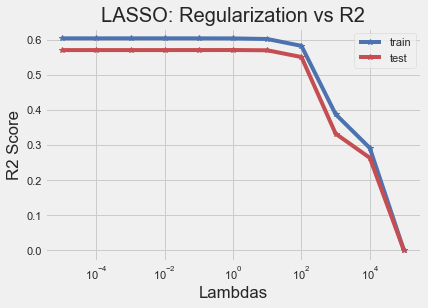

In [186]:
plt.semilogx(lmbdas, train_accuracy,'*-b', label='train')
plt.semilogx(lmbdas, test_accuracy,'*-r', label='test')
plt.title("LASSO: Regularization vs R2")
plt.ylabel("R2 Score")
plt.xlabel("Lambdas")
plt.legend()

max_acc = max(test_accuracy)
max_index = np.argmax(test_accuracy)
print("Optimal index:", max_index, "\nBest test accuracy:", max_acc, "\nOptimal Lambda:", lmbdas[max_index])

In [191]:
lasso_opt = linear_model.Lasso(alpha = 1, random_state = 1) 
lasso_opt.fit(train_X, train_y['total_cust'])
y_pred = lasso_opt.predict(test_X)

rmse = float(format(np.sqrt(mean_squared_error(test_y['total_cust'], y_pred)), '.3f'))
print("RMSE:", rmse)

print('intercept: ', lasso_opt.intercept_)
for i in (list(zip(train_X[lm_features], lasso_opt.coef_))):
    print(i, sep='\n')

RMSE: 2454.845
intercept:  4119.03625613042
('temp_avg', 946.9522114304515)
('temp_min', -133.5206818774375)
('temp_max', -152.97648540591328)
('temp_observ', -422.8116173983057)
('precip', -26.248333990460583)
('wind', -36.91237973567091)
('wt_fog', 113.42767006340968)
('wt_heavy_fog', 440.41699179237014)
('wt_thunder', -329.96504643229133)
('wt_sleet', -78.00095275554655)
('wt_hail', -2.6130658490648986)
('wt_glaze', -852.6123967529616)
('wt_haze', -506.4846972102334)
('wt_drift_snow', 0.0)
('wt_high_wind', 211.3011932639214)
('wt_mist', -2235.883525063383)
('wt_drizzle', 765.6941777964714)
('wt_rain', -2559.9027027878747)
('wt_freeze_rain', 839.9298009169149)
('wt_snow', -165.64660827081383)
('wt_ground_fog', 5.806642231443874)
('wt_ice_fog', 409.1707774300809)
('wt_freeze_drizzle', -0.0)
('holiday', -887.0878057163745)


**Interesting points: ('wt_drift_snow', 0.0), ('wt_freeze_drizzle', -0.0)**

Seems like drifting snow and freezing drizzles does not really affect demand as much. The weights on those are much higher in the linear regression case. These are mild weather patterns, and usually occurs in the winter season where not many people are biking anyways, so it does make a little bit of sense as to why they are set to 0. We have to beware of instrumental variables, for example high wind might be correlated with snow, but for simplicity sake I am going to ignore instrumental variables for now.

All the temperature variables have weights, which makes sense since they are all so correlated with each other and our regularization variable is not too high.

I don't think ridge regression would be very interesting, it would be similar to linear regression without regularization. ElasticNet would be more interesting, but there aren't really any sparsity even in the LASSO case.

### Logistic Regression L1

In [193]:
train_accuracy = np.zeros(len(lmbdas))
test_accuracy = np.zeros(len(lmbdas))

for i, lmbda in enumerate(lmbdas):

    L1_log = linear_model.LogisticRegression(C=1/lmbda, random_state=1, 
                                             max_iter=1E4, solver='liblinear', l1_ratio=1) # 1 = LASSO
    L1_log.fit(train_X, train_y['total_cust'])
    print("iteration", i, "done")
    
    train_accuracy[i] = L1_log.score(train_X, train_y['total_cust'])
    test_accuracy[i] = L1_log.score(test_X, test_y['total_cust'])

iteration 0 done
iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done


Optimal index: 0 
Best test accuracy: 0.0 
Optimal Lambda: 1e-05


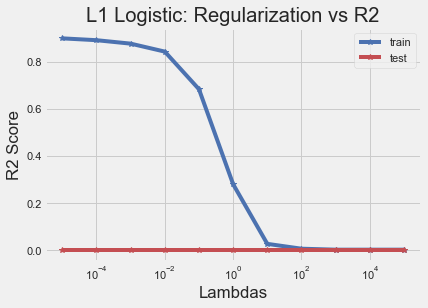

In [194]:
plt.semilogx(lmbdas, train_accuracy,'*-b', label='train')
plt.semilogx(lmbdas, test_accuracy,'*-r', label='test')
plt.title("L1 Logistic: Regularization vs R2")
plt.ylabel("R2 Score")
plt.xlabel("Lambdas")
plt.legend()

max_acc = max(test_accuracy)
max_index = np.argmax(test_accuracy)
print("Optimal index:", max_index, "\nBest test accuracy:", max_acc, "\nOptimal Lambda:", lmbdas[max_index])

In [197]:
L1_log = linear_model.LogisticRegression(C=1/lmbda, random_state=1, 
                                         max_iter=1E4, solver='liblinear', l1_ratio=1)
L1_log.fit(train_X, train_y['total_cust'])
y_pred = L1_log.predict(test_X)

rmse = float(format(np.sqrt(mean_squared_error(test_y['total_cust'], y_pred)), '.3f'))
print("\nRMSE for num_est =", rmse)


RMSE for num_est = 4396.17


Logistic regression is very bad model at predicting in this case. I am wondering if this has to do with the number of iterations. I tried different values of l1 ratio and all of them fail to give me good results. A test accuracy of 0 just seems very suspicious to me...

### Random Forest

In [199]:
from sklearn.ensemble import RandomForestRegressor

num_est = np.logspace(1,4,4, dtype=int)

for i, num in enumerate(num_est):

    rf = RandomForestRegressor(n_estimators = num, random_state = 1)
    rf.fit(train_X, train_y['total_cust'])
    y_pred = rf.predict(test_X)

    rmse = float(format(np.sqrt(mean_squared_error(test_y['total_cust'], y_pred)), '.3f'))
    print("\nRMSE for num_est =", num, rmse)


RMSE for num_est = 10 2382.15

RMSE for num_est = 100 2237.959

RMSE for num_est = 1000 2234.258

RMSE for num_est = 10000 2237.529


Seems like the optimal number of tree is around 1000. Let's pick 1000 for simplicity sake and check for feature importance.

In [206]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)
rf.fit(train_X, train_y['total_cust'])

# Feature Importance
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(lm_features, importances)]

for i in feature_importances:
    print(i, sep='\n')

('temp_avg', 0.24)
('temp_min', 0.05)
('temp_max', 0.28)
('temp_observ', 0.06)
('precip', 0.08)
('wind', 0.06)
('wt_fog', 0.01)
('wt_heavy_fog', 0.0)
('wt_thunder', 0.01)
('wt_sleet', 0.0)
('wt_hail', 0.0)
('wt_glaze', 0.0)
('wt_haze', 0.01)
('wt_drift_snow', 0.0)
('wt_high_wind', 0.0)
('wt_mist', 0.04)
('wt_drizzle', 0.0)
('wt_rain', 0.15)
('wt_freeze_rain', 0.0)
('wt_snow', 0.0)
('wt_ground_fog', 0.0)
('wt_ice_fog', 0.0)
('wt_freeze_drizzle', 0.0)
('holiday', 0.0)


The most important features are 'temp_max' and 'temp_avg', which makes sense because temperature is something bikers consider when deciding to bike. Rainy weather is also another important feature. It is more important than any other weather (hail, sleet which might be considered more severe) which is interesting. The minimum temperature is way less important than the maximum temperature, so riders seem to care more about hot than cold--or simply only considering the high of the day when looking at temperatures.

### Decision Trees

In [219]:
from sklearn.tree import DecisionTreeRegressor
num_trees = np.linspace(1,20,10,dtype=int)

for i, num in enumerate(num_trees):

    tree = DecisionTreeRegressor(max_depth = num, random_state=0)
    tree.fit(train_X, train_y['total_cust'])

    y_pred = tree.predict(test_X)
    
    rmse = float(format(np.sqrt(mean_squared_error(test_y['total_cust'], y_pred)), '.3f'))
    print("\nRMSE for num_est =", num, rmse)


RMSE for num_est = 1 3111.457

RMSE for num_est = 3 2554.336

RMSE for num_est = 5 2436.51

RMSE for num_est = 7 2502.56

RMSE for num_est = 9 2625.692

RMSE for num_est = 11 2760.399

RMSE for num_est = 13 2869.025

RMSE for num_est = 15 3033.961

RMSE for num_est = 17 3018.539

RMSE for num_est = 20 3137.121


In [220]:
tree_opt = DecisionTreeRegressor(max_depth = 5, random_state=0)
tree_opt.fit(train_X, train_y['total_cust'])

y_pred = tree_opt.predict(test_X)

# Feature Importance
importances = list(tree_opt.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(lm_features, importances)]

for i in feature_importances:
    print(i, sep='\n')

('temp_avg', 0.12)
('temp_min', 0.0)
('temp_max', 0.51)
('temp_observ', 0.0)
('precip', 0.05)
('wind', 0.01)
('wt_fog', 0.0)
('wt_heavy_fog', 0.0)
('wt_thunder', 0.0)
('wt_sleet', 0.0)
('wt_hail', 0.0)
('wt_glaze', 0.0)
('wt_haze', 0.0)
('wt_drift_snow', 0.0)
('wt_high_wind', 0.0)
('wt_mist', 0.05)
('wt_drizzle', 0.0)
('wt_rain', 0.25)
('wt_freeze_rain', 0.0)
('wt_snow', 0.01)
('wt_ground_fog', 0.0)
('wt_ice_fog', 0.0)
('wt_freeze_drizzle', 0.0)
('holiday', 0.0)


In decision trees, 'temp_max' and 'wt_rain' are the most important features. Just like random forest, 'temp_max' plays a rather large role in predicting demand and rainy weather now plays a larger role as well. I am surprised that precipitation does not play that large of a role, since precipitation can affect travel.

## Predicting Demands from Casual Riders

### LASSO

In [221]:
lmbdas = np.logspace(-5,5,11)

train_accuracy = np.zeros(len(lmbdas))
test_accuracy = np.zeros(len(lmbdas))

for i, lmbda in enumerate(lmbdas):

    lasso_reg = linear_model.Lasso(alpha = lmbda, random_state = 1)   
    lasso_reg.fit(train_X, train_y['casual'])

    # check accuracy
    train_accuracy[i] = lasso_reg.score(train_X, train_y['casual'])
    test_accuracy[i] = lasso_reg.score(test_X, test_y['casual'])

Optimal index: 4 
Best test accuracy: 0.36816198018582835 
Optimal Lambda: 0.1


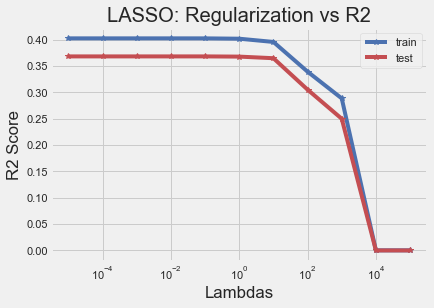

In [222]:
plt.semilogx(lmbdas, train_accuracy,'*-b', label='train')
plt.semilogx(lmbdas, test_accuracy,'*-r', label='test')
plt.title("LASSO: Regularization vs R2")
plt.ylabel("R2 Score")
plt.xlabel("Lambdas")
plt.legend()

max_acc = max(test_accuracy)
max_index = np.argmax(test_accuracy)
print("Optimal index:", max_index, "\nBest test accuracy:", max_acc, "\nOptimal Lambda:", lmbdas[max_index])

In [224]:
lasso_opt = linear_model.Lasso(alpha = 0.1, random_state = 1) 
lasso_opt.fit(train_X, train_y['casual'])
y_pred = lasso_opt.predict(test_X)

rmse = float(format(np.sqrt(mean_squared_error(test_y['casual'], y_pred)), '.3f'))
print("RMSE:", rmse)

print('intercept: ', lasso_opt.intercept_)
for i in (list(zip(train_X[lm_features], lasso_opt.coef_))):
    print(i, sep='\n')

RMSE: 1249.504
intercept:  116.58070734148578
('temp_avg', 230.63032855476067)
('temp_min', -67.73918446562088)
('temp_max', 3.789907365900294)
('temp_observ', -75.02545325118531)
('precip', -6.949618098326331)
('wind', -21.256025309171786)
('wt_fog', -60.736580723697266)
('wt_heavy_fog', 64.38845522853157)
('wt_thunder', -80.65200770364821)
('wt_sleet', 32.30096060426107)
('wt_hail', -77.09416801767051)
('wt_glaze', -90.85098055827228)
('wt_haze', -301.73878226659974)
('wt_drift_snow', 570.2263863988978)
('wt_high_wind', 37.08510908113428)
('wt_mist', -498.08082821683826)
('wt_drizzle', 378.5336883349113)
('wt_rain', -805.1042862793374)
('wt_freeze_rain', 443.0679497464175)
('wt_snow', 235.58829249109235)
('wt_ground_fog', -202.54599246696125)
('wt_ice_fog', 355.7361939779169)
('wt_freeze_drizzle', 229.11246553867716)
('holiday', 574.1001676071526)


There are no weights that are set to 0, which makes sense since our lambda value is small (0.1). We can look at Random Forest to see which features are more important.

### Random Forest

In [225]:
num_est = np.logspace(1,4,4, dtype=int)

for i, num in enumerate(num_est):

    rf = RandomForestRegressor(n_estimators = num, random_state = 1)
    rf.fit(train_X, train_y['casual'])
    y_pred = rf.predict(test_X)

    rmse = float(format(np.sqrt(mean_squared_error(test_y['casual'], y_pred)), '.3f'))
    print("\nRMSE for num_est =", num, rmse)


RMSE for num_est = 10 1308.075

RMSE for num_est = 100 1251.058

RMSE for num_est = 1000 1238.4

RMSE for num_est = 10000 1239.111


In [226]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)
rf.fit(train_X, train_y['casual'])

# Feature Importance
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(lm_features, importances)]

for i in feature_importances:
    print(i, sep='\n')

('temp_avg', 0.15)
('temp_min', 0.09)
('temp_max', 0.34)
('temp_observ', 0.08)
('precip', 0.1)
('wind', 0.1)
('wt_fog', 0.01)
('wt_heavy_fog', 0.0)
('wt_thunder', 0.01)
('wt_sleet', 0.0)
('wt_hail', 0.0)
('wt_glaze', 0.0)
('wt_haze', 0.02)
('wt_drift_snow', 0.0)
('wt_high_wind', 0.0)
('wt_mist', 0.02)
('wt_drizzle', 0.0)
('wt_rain', 0.07)
('wt_freeze_rain', 0.0)
('wt_snow', 0.0)
('wt_ground_fog', 0.0)
('wt_ice_fog', 0.0)
('wt_freeze_drizzle', 0.0)
('holiday', 0.01)


### Decision Trees

In [228]:
num_trees = np.linspace(1,20,10,dtype=int)

for i, num in enumerate(num_trees):

    tree = DecisionTreeRegressor(max_depth = num, random_state=0)
    tree.fit(train_X, train_y['casual'])

    y_pred = tree.predict(test_X)
    
    rmse = float(format(np.sqrt(mean_squared_error(test_y['casual'], y_pred)), '.3f'))
    print("\nRMSE for num_tree =", num, rmse)


RMSE for num_tree = 1 1374.11

RMSE for num_tree = 3 1262.719

RMSE for num_tree = 5 1265.802

RMSE for num_tree = 7 1310.934

RMSE for num_tree = 9 1416.627

RMSE for num_tree = 11 1566.403

RMSE for num_tree = 13 1625.142

RMSE for num_tree = 15 1588.342

RMSE for num_tree = 17 1720.154

RMSE for num_tree = 20 1733.571


In [229]:
tree_opt = DecisionTreeRegressor(max_depth = 3, random_state=0)
tree_opt.fit(train_X, train_y['casual'])

y_pred = tree_opt.predict(test_X)

# Feature Importance
importances = list(tree_opt.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(lm_features, importances)]

for i in feature_importances:
    print(i, sep='\n')

('temp_avg', 0.08)
('temp_min', 0.0)
('temp_max', 0.72)
('temp_observ', 0.0)
('precip', 0.02)
('wind', 0.0)
('wt_fog', 0.0)
('wt_heavy_fog', 0.0)
('wt_thunder', 0.0)
('wt_sleet', 0.0)
('wt_hail', 0.0)
('wt_glaze', 0.0)
('wt_haze', 0.0)
('wt_drift_snow', 0.0)
('wt_high_wind', 0.0)
('wt_mist', 0.0)
('wt_drizzle', 0.0)
('wt_rain', 0.18)
('wt_freeze_rain', 0.0)
('wt_snow', 0.0)
('wt_ground_fog', 0.0)
('wt_ice_fog', 0.0)
('wt_freeze_drizzle', 0.0)
('holiday', 0.0)


Max temperature and rainy weather play large roles in casual user demand as well. In decision trees, it seems like only the max temperature and rain dictate most casual riders.

## Conclusions

In terms of RMSE, Random Forest is the best algorithm for predicting demand for both total users and casual users. There are not enough data for various weather conditions and holdays, so it is understandable from the tree algorithms that many weather conditions are not important. This is a rather small dataset and there are many unbalanced features ('wt_sleet', 'holiday', etc.), so if we want to create a cross validation dataset as well, we might have to try upsampling or bootstrapping. 

The best features used to predict demand seems to be 'temp_max' and 'wt_rain'. I am not surprised that a temperature feature is one of the most important features since bike sharing demand looks to be seasonal, which is correlated with temperature. Bike share businesses can close down various unpopular bike stations to save money over the winter when demand is low. 

# Feedback to Self For Next Time

1. Setting aside a cross validation set instead of using the test set as cross validation (also for 10 fold CV).
2. Different charts and more time on EDA
3. Find better ways to impute temperatures (e.g. average by season/percentile based on season/date)
4. Working with bigger data sets and algoithms (GBM, XGBoost, NN, etc.)
5. Creating new variables (e.g. season etc.)